<a href="https://colab.research.google.com/github/vvrgit/Udemy-Oprimization-Basics/blob/main/NAG_CaseStudy_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

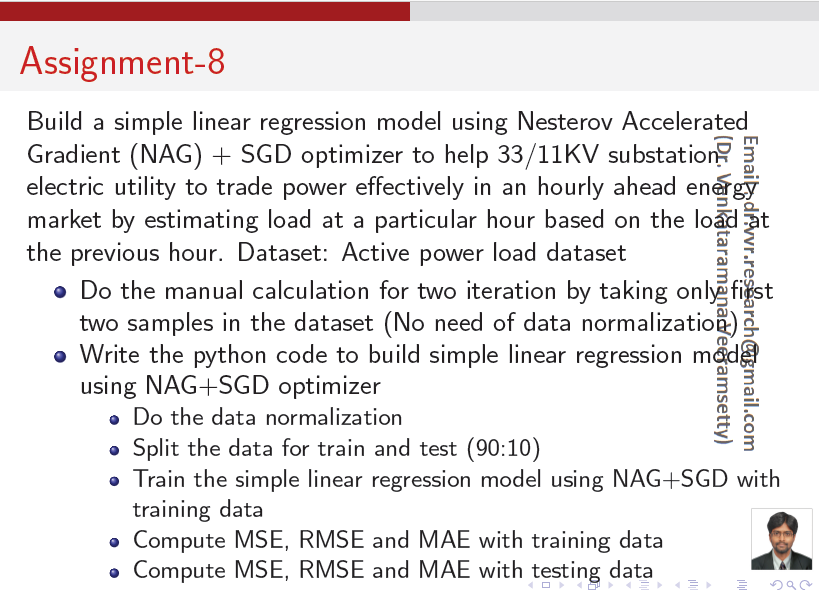

In [1]:
import pandas as pd
import random

In [11]:
data=pd.read_excel("/content/NAG_LoadData.xlsx")
data.head()

,X,Y
0,5551.82208,4983.17184
1,4983.17184,4888.39680
2,4888.39680,5072.95872
3,5072.95872,5196.25980
4,5196.25980,5641.29720


In [16]:
x_min=data["X"].min()
x_max=data["X"].max()
y_min=data["Y"].min()
y_max=data["Y"].max()
print(x_min)

4689.02628


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_data = scaler.fit_transform(data)

# Convert the normalized data back to a DataFrame for easier viewing
normalized_df = pd.DataFrame(normalized_data, columns=data.columns)

# Display the first few rows of the normalized data
display(normalized_df.head())

,X,Y
0,0.259567,0.088492
1,0.088492,0.059979
2,0.059979,0.115504
3,0.115504,0.152598
4,0.152598,0.286485


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_df.X, normalized_df.Y, test_size=0.1, random_state=42) # You can adjust test_size and random_state as needed


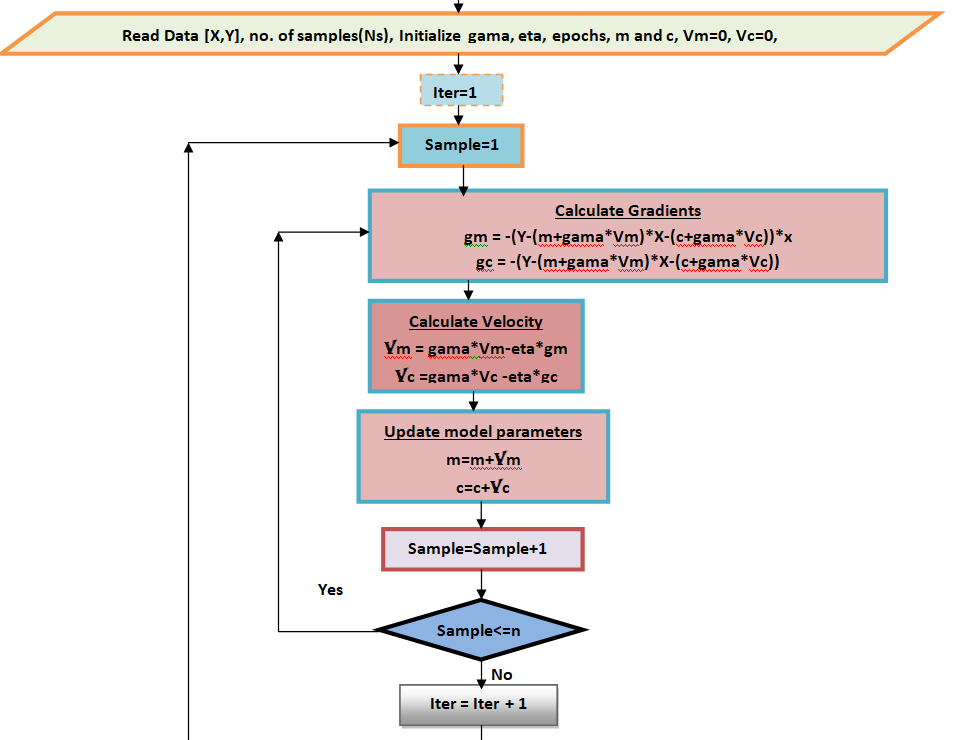

In [7]:
Ns=X_train.shape[0]
gama=0.9
eta=0.01
epochs=100
m=random.uniform(-1,1)
c=random.uniform(-1,1)
vm=0
vc=0

In [8]:
for iter in range(epochs):
  for sample in range(Ns):
    gm=-(y_train.iloc[sample]-(m+gama*vm)*X_train.iloc[sample]-(c+gama*vc))*X_train.iloc[sample]
    gc=-(y_train.iloc[sample]-(m+gama*vm)*X_train.iloc[sample]-(c+gama*vc))
    vm=gama*vm-eta*gm
    vc=gama*vc-eta*gc
    m=m+vm
    c=c+vc
print("m=",m)
print("c=",c)

m= 0.7242694514369081
c= 0.0950240621727399


In [9]:
y_train_pred=m*X_train+c
mse=((y_train-y_train_pred)**2).mean()
print("training mse=",mse)

training mse= 0.03386996661292691


In [10]:
y_test_pred=m*X_test+c
mse=((y_test-y_test_pred)**2).mean()
print("testing mse=",mse)

testing mse= 0.008620698716600874


In [17]:
Load=input("enter previous hour load")
Load=float(Load)
Load=(Load-x_min)/(x_max-x_min)
m=0.72
c=0.09
y_pred=m*Load+c
y_pred=(y_pred*(y_max-y_min))+y_min
print("predicted load=",y_pred)

enter previous hour load5551.8
predicted load= 5609.3820192
